## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.52229134 0.45974266]


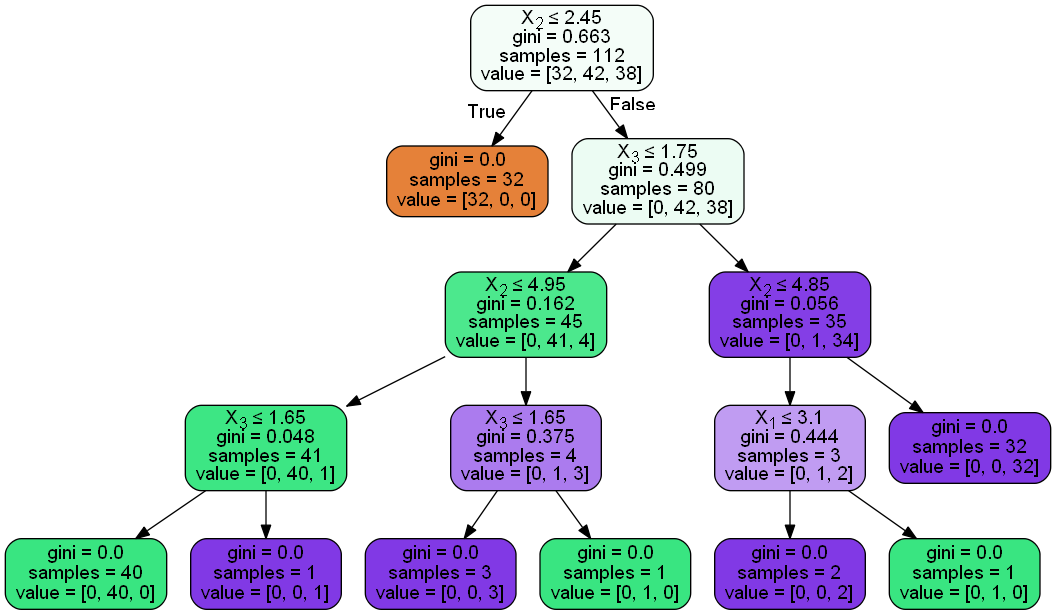

In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [5]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split (boston.data, boston.target, test_size =0.25, random_state = 65)
print ("data=", boston.data.shape, 'Target=', boston.target.shape)
clf = DecisionTreeRegressor()
print ("x_train=", x_train.shape, "y_train", y_train.shape)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

data= (506, 13) Target= (506,)
x_train= (379, 13) y_train (379,)


In [6]:
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", MSE)
print(boston.feature_names)
print("Feature importance: ", clf.feature_importances_)

MSE:  37.686141732283474
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [1.26315183e-02 2.16971317e-04 7.33476510e-03 3.44995551e-04
 3.54208299e-02 6.55677258e-01 2.63775284e-02 4.00568002e-02
 1.06813117e-03 1.56322681e-02 2.84664468e-02 5.94581050e-03
 1.70826676e-01]


In [7]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit (x_train, y_train)
y_pred = reg.predict(x_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", MSE)
print(boston.feature_names)
print("Feature importance: ", reg.coef_)

MSE:  30.159933394840394
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [-0.07298475  0.0463483  -0.04483893  0.05003855 -0.          4.27871082
 -0.01990838 -1.19501664  0.26759172 -0.01838926 -0.84843423  0.00920671
 -0.46371704]


In [9]:
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split (wine.data, wine.target, test_size =0.25, random_state = 65)
print ("data=", wine.data.shape, 'wine=', wine.target)
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

data= (178, 13) wine= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", MSE)
print(wine.feature_names)
print("Feature importance: ", clf.feature_importances_)

MSE:  0.08888888888888889
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.01104854 0.         0.         0.01218172 0.         0.
 0.65007734 0.         0.0119169  0.07973488 0.         0.
 0.23504062]


In [11]:
reg = linear_model.Ridge(alpha = 0.1)
reg.fit (x_train, y_train)
y_pred = reg.predict(x_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", MSE)
print(wine.feature_names)
print("Feature importance: ", reg.coef_)

MSE:  0.057689420456447454
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [-0.13103847  0.02801354 -0.05076013  0.02856392 -0.00170781  0.05577556
 -0.35691776 -0.27781316  0.08741652  0.08205058 -0.24747064 -0.24304036
 -0.00074553]


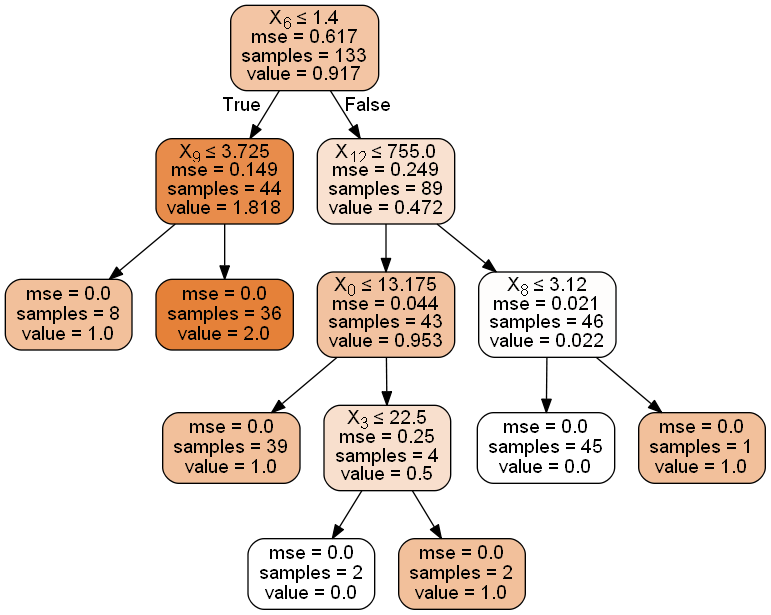

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())